# **Lab 3 : Implement a simple linear regression model in Python using scikit-learn.**


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
np.random.seed(0)

In [37]:
data1 = pd.read_csv('project_data.csv')
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
nai_data = data1['age']
nai_data

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [39]:
ache_data = data1['thalach']
ache_data

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ache_data, nai_data, test_size=0.2, random_state=27)

# Convert Pandas Series to NumPy array and reshape
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Creating a Linear Regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train_reshaped, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test_reshaped)


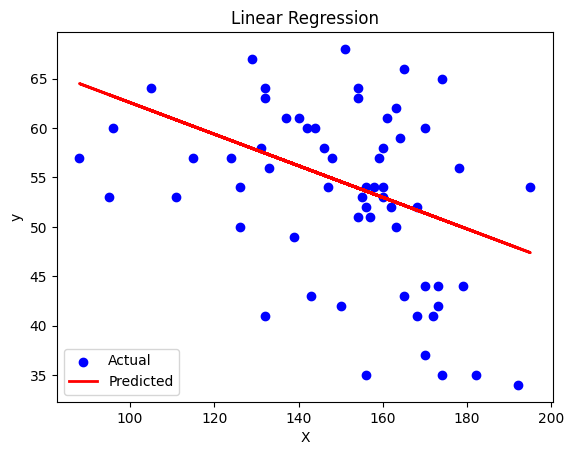

In [41]:
# Plotting the actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# **Lab 4 : Create a decision tree classifier in Python using scikit-learn and train it on a given dataset.**

In [42]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ache_data, nai_data, test_size=0.2, random_state=42)

# Reshape the data into a 2D array
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Creating a Decision Tree Classifier
classifier = DecisionTreeClassifier()

print(y_train.dtype)
print(X_train.dtype)

# Training the classifier on the training data
classifier.fit(X_train_reshaped, y_train)

# Making predictions on the test data
y_pred = classifier.predict(X_test_reshaped)


int64
int64


In [44]:
# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.03278688524590164


# ***Lab 5:  Split your dataset into training and testing sets using scikit-learn***

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ache_data, nai_data, test_size=0.2, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)


X_train shape: (242,)
y_train shape: (242,)
X_test shape: (61,)
y_test shape: (61,)


# **LAB 6 : On  given dataset we perform k-means clustering using Python . scikit-learn on a given dataset.**

In [46]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Generating some sample data
np.random.seed(0)
#X = np.random.rand(100, 2)  # Generate 100 random 2-dimensional data points
#X = np.column_stack((nai_data, ache_data))
data1= pd.read_csv('project_data.csv')
data1
nai_data = data1['age']
nai_data
ache_data = data1['thalach']
ache_data
X = np.column_stack((nai_data, ache_data))


In [48]:


# Performing k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly set n_init
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


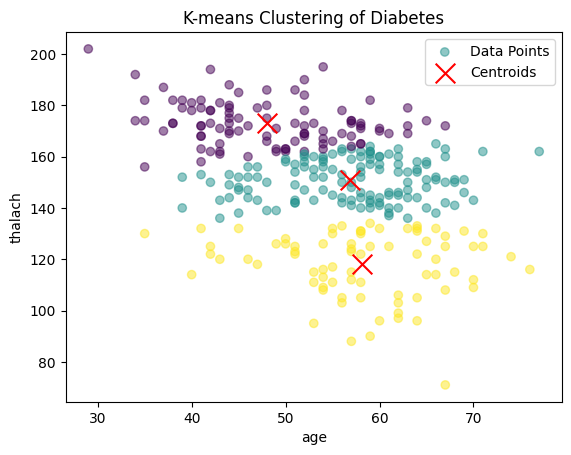

In [49]:
# Plotting the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.xlabel('age')
plt.ylabel('thalach')
plt.title('K-means Clustering of Diabetes')
plt.legend()
plt.show()


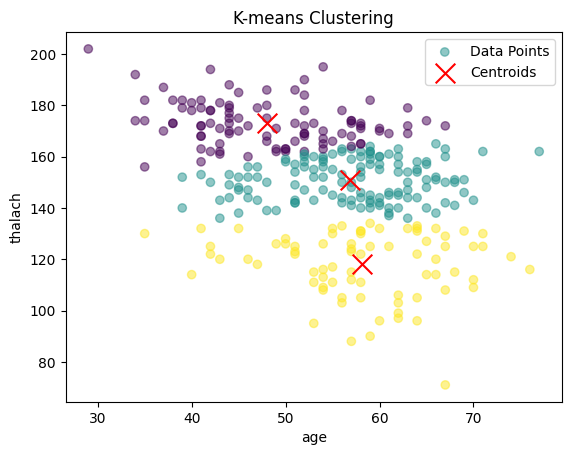

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def perform_kmeans(X, n_clusters=3, random_state=None):
    """
    Performs k-means clustering on a given dataset.

    Parameters:
    - X: Features array
    - n_clusters: The number of clusters to form as well as the number of centroids to generate (default is 3)
    - random_state: Random seed for reproducibility (default is None)

    Returns:
    - labels: Cluster labels for each data point
    - centroids: Coordinates of cluster centers
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)  # Suppress FutureWarning
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids


# Combine nai_data and ache_data to create X
X = np.column_stack((nai_data, ache_data))

# Example usage:
labels, centroids = perform_kmeans(X, n_clusters=3, random_state=42)

# Plotting the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.xlabel('age')
plt.ylabel('thalach')
plt.title('K-means Clustering')
plt.legend()
plt.show()


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ache_data, nai_data, test_size=0.2, random_state=42)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (242,)
y_train shape: (242,)
X_test shape: (61,)
y_test shape: (61,)
